In [6]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

dtype: uint8, shape: (122, 120, 3), min: 0, max: 255


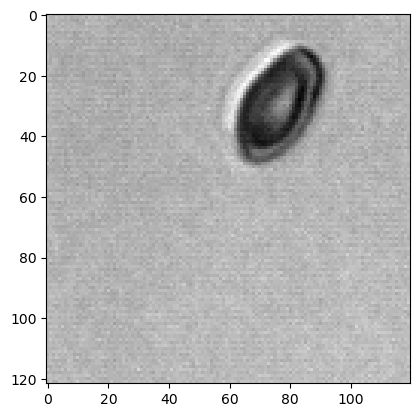

In [7]:
path = (
    "/home/t.afanasyeva/deep_learning_anaemias/resources/images_subset/large_cell.tif"
)
# img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
img = cv2.imread(path)
assert img is not None, "file could not be read, check with os.path.exists()"

print(f"dtype: {img.dtype}, shape: {img.shape}, min: {np.min(img)}, max: {np.max(img)}")
plt.imshow(img, "gray", vmin=0, vmax=255)

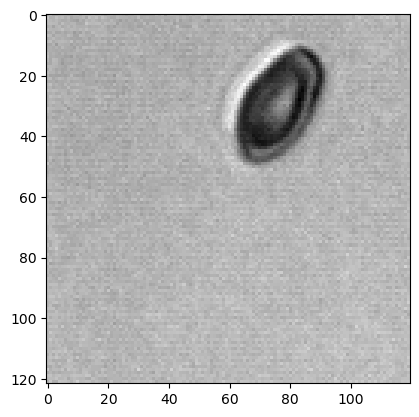

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="grey")

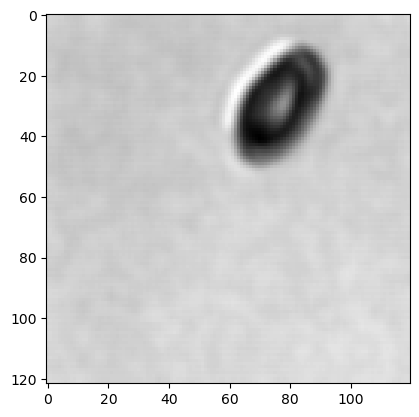

In [30]:
# Smooth image
blur = cv2.GaussianBlur(gray, (5, 5), 3)
plt.imshow(blur, cmap="grey")

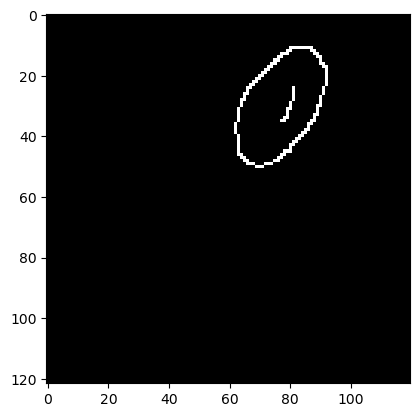

In [32]:
# Detect edges
edges = cv2.Canny(blur, threshold1=150, threshold2=200)
plt.imshow(edges, cmap="gray")

In [33]:
def is_image_empty(image):  # to check if cells are present
    return np.all(image == 0)


# thresh = np.zeros((3,3))
print(is_image_empty(thresh))

False


In [39]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

valid_contours = []

for contour, h in zip(contours, hierarchy[0]):

    # Check if the contour is not inside another contour (parent index is -1)
    if h[3] == -1:
        print(h)
        area = cv2.contourArea(contour)
        # Check if the area is less than 1200 pixels
        if area >= 200:
            print(area)
            valid_contours.append(contour)

if len(valid_contours) != 1:
    print("Image contains duplicte cells, excluding!")

[-1 -1  1 -1]
14399.0
1


In [42]:
import hashlib

bytes = gray.tobytes()
salt = os.urandom(16)  # 16 bytes of randomness
bytes_with_salt = bytes + salt  # append the salt to the file content
readable_hash = hashlib.sha256(bytes_with_salt).hexdigest()

In [46]:
hash = readable_hash[:32]

In [47]:
cv2.imwrite(f"{hash}.jpeg", gray)

True